### Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the vaues
3. Train the spilt
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement-dataset.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
# Show the details of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(100, 4)

0. Preprocess
that handle unnecessary column.

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


 EDA it's normally show how data look like but not exactly.

In [9]:
import matplotlib.pyplot as plt

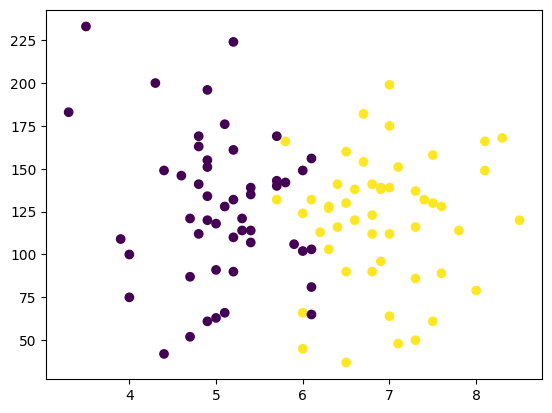

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In this section, Feature selection is skip now...

1. Extract input and output cols

In [11]:
# Take all independent input at X and output at y
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

2. Train the spilt

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [15]:
X_train,y_train

(    cgpa     iq
 41   5.4  114.0
 91   7.5  158.0
 22   4.9  120.0
 59   4.8  112.0
 31   3.9  109.0
 ..   ...    ...
 10   6.0   45.0
 45   6.0   66.0
 20   6.6  120.0
 73   4.9   61.0
 12   5.4  139.0
 
 [90 rows x 2 columns],
 41    0
 91    1
 22    0
 59    0
 31    0
      ..
 10    1
 45    1
 20    1
 73    0
 12    0
 Name: placement, Length: 90, dtype: int64)

3. Scale the vaues

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
X_train,X_test

(array([[-5.11048632e-01, -2.49951099e-01],
        [ 1.28427091e+00,  8.16650574e-01],
        [-9.38505666e-01, -1.04505416e-01],
        [-1.02399707e+00, -2.98432993e-01],
        [-1.79341973e+00, -3.71155835e-01],
        [-1.19497989e+00,  5.25759209e-01],
        [ 4.29356843e-01,  8.65132468e-01],
        [-1.69083005e-01,  1.01057815e+00],
        [ 2.13918498e+00, -1.04505416e-01],
        [-2.54574411e-01,  4.53036367e-01],
        [-5.96540039e-01, -2.49951099e-01],
        [ 1.11328810e+00, -2.01469205e-01],
        [-7.67522852e-01,  8.94221605e-02],
        [ 6.85831064e-01, -8.31733830e-01],
        [-6.82031446e-01,  1.86385949e-01],
        [ 8.73912159e-02,  1.86385949e-01],
        [-8.53014259e-01, -1.52987311e-01],
        [-9.38505666e-01,  6.46963944e-01],
        [-1.02399707e+00,  1.08330099e+00],
        [-1.02399707e+00,  9.37855309e-01],
        [-7.67522852e-01,  1.25298762e+00],
        [ 1.89980904e-03, -7.54162799e-03],
        [ 1.96820217e+00,  1.059

4. Train the model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
# model training
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


5. Evaluate the model/model selection

In [23]:
y_pred=clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)

0.9

6. Deploy the model

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

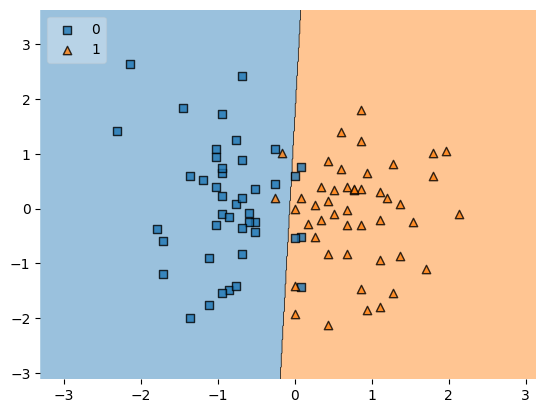

In [31]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))